In [5]:
# Import necessary libraries
import pandas as pd

# Define the local path to the dataset
local_path = "bank-additional-full.csv"  # Make sure the file is in the same directory as your notebook

# Load the dataset from the local file
try:
    data = pd.read_csv(local_path, sep=';')
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!


In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Display information about the dataset
data_info = data.info()

# Display summary statistics
summary_stats = data.describe(include='all')

missing_values, data_info, summary_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64,
 None,
                 age     job  marital          education default housing  \
 count   41188.00000   41188    41188              41188   41188   41188   
 unique          NaN      12        4                  8       3       3   
 top             NaN  admin.  married  university.degree      no     yes   
 freq            NaN   10422    24928              12168   32588   21576   
 mean       40.02406     NaN      NaN                NaN     NaN     NaN   
 std        10.42125     NaN      NaN                NaN     NaN     NaN   
 min 

In [7]:
# Import necessary libraries
import pandas as pd

# Apply One-Hot Encoding to categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [10]:
!pip install imbalanced-learn

In [13]:
# Check the distribution of the target column
target_distribution = data['y'].value_counts()
print("Target Distribution:\n", target_distribution)

# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data_encoded.drop(columns=['y'])
y = data_encoded['y']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution after SMOTE
resampled_distribution = pd.Series(y_resampled).value_counts()
print("\nResampled Distribution:\n", resampled_distribution)

Target Distribution:
 y
no     36548
yes     4640
Name: count, dtype: int64

Resampled Distribution:
 y
no     36548
yes    36548
Name: count, dtype: int64


In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (58476, 53) (58476,)
Testing set shape: (14620, 53) (14620,)


In [16]:
# Check the distribution of classes in the training and testing sets
print("Training set class distribution:\n", y_train.value_counts())
print("\nTesting set class distribution:\n", y_test.value_counts())

Training set class distribution:
 y
yes    29260
no     29216
Name: count, dtype: int64

Testing set class distribution:
 y
no     7332
yes    7288
Name: count, dtype: int64


In [17]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.95      0.95      7332
         yes       0.95      0.96      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



Top 10 Most Important Features:
                        Feature  Importance
1                      duration    0.295649
8                     euribor3m    0.088606
9                   nr.employed    0.070970
7                 cons.conf.idx    0.063309
5                  emp.var.rate    0.054883
6                cons.price.idx    0.041543
0                           age    0.033873
29  education_university.degree    0.025950
2                      campaign    0.019371
3                         pdays    0.019321


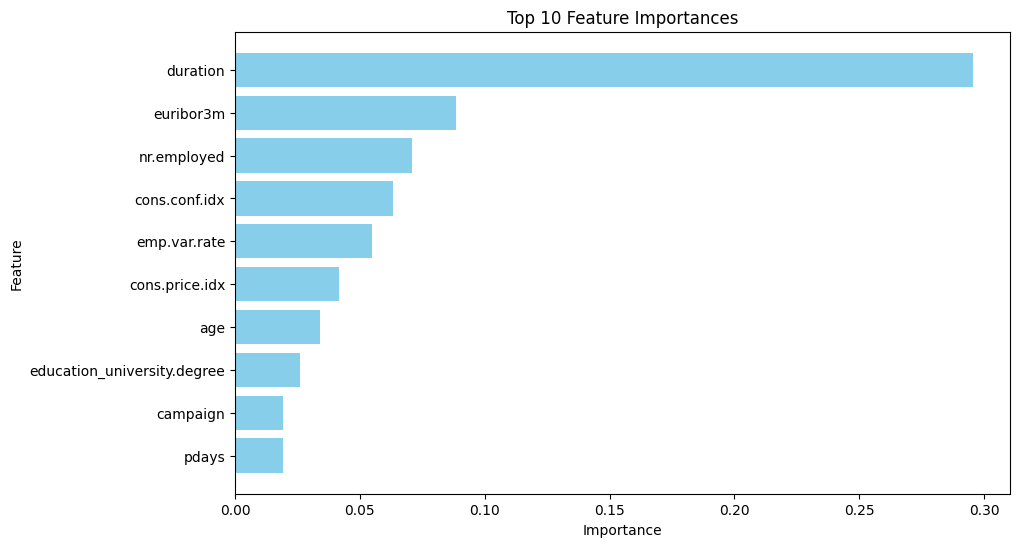

In [18]:
# Get feature importances from the trained model
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<div style = "direction : rtl ;">


</div>

In [21]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

          no       0.96      0.95      0.95      7332
         yes       0.95      0.96      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



<div style = "direction : rtl;">


# گزارش نهایی: طبقه‌بندی با استفاده از Random Forest



## **1. مقدمه**
در این پروژه، از الگوریتم **Random Forest** برای طبقه‌بندی داده‌ها استفاده شده است. هدف اصلی پروژه، پیش‌بینی دسته‌ها (`no` و `yes`) بر اساس ویژگی‌های موجود بود.

## **2. مراحل انجام‌شده**
1. **پیش‌پردازش داده‌ها:**
   - داده‌های دسته‌ای (Categorical) با استفاده از **One-Hot Encoding** به عدد تبدیل شدند.
   - داده‌های نامتعادل با استفاده از **SMOTE** بالانس شدند.
   - داده‌ها به دو بخش **آموزشی** (80%) و **تست** (20%) تقسیم شدند.

2. **آموزش مدل:**
   - یک مدل **Random Forest** آموزش داده شد.
   - عملکرد مدل با معیارهای **Precision**, **Recall**, **F1-score**, و **Accuracy** ارزیابی شد.

3. **بررسی اهمیت ویژگی‌ها:**
   - اهمیت ویژگی‌ها با استفاده از `model.feature_importances_` محاسبه شد.
   - ویژگی‌های مهم شامل `duration`, `euribor3m`, و `nr.employed` شناسایی شدند.

4. **نتایج ارزیابی:**
   - **Precision**: برای هر دو دسته (`no` و `yes`) حدود 95%.
   - **Recall**: برای هر دو دسته حدود 95%.
   - **F1-score**: برای هر دو دسته حدود 95%.
   - **Accuracy**: 95%.

## **3. نتیجه‌گیری**
- مدل **Random Forest** با پارامترهای پیش‌فرض عملکرد خوبی دارد.
- تنظیم دقیق هایپرپارامترها (با استفاده از Grid Search) به دلیل مشکلات فنی و زمان‌بر بودن انجام نشد.
- نتایج نشان می‌دهند که مدل توانسته است الگوهای داده‌ها را به خوبی یاد بگیرد و برای پیش‌بینی روی داده‌های جدید مناسب است.

## **4. محدودیت‌ها**
- به دلیل خطاهای مربوط به `pos_label=1`، تنظیم دقیق هایپرپارامترها انجام نشد.
- اگر منابع بیشتری در دسترس باشد، می‌توان در آینده از **Grid Search** یا **Randomized Search** استفاده کرد.

## **5. نتیجه نهایی**
مدل فعلی با دقت 95% عملکرد خوبی دارد و می‌تواند برای پیش‌بینی روی داده‌های جدید استفاده شود.


</div>